In this project we use the data on child care facilities in New York City (link here https://data.cityofnewyork.us/api/views/dsg6-ifza/rows.csv?accessType=DOWNLOAD) to write predicting models on the probability of child care centers violating the rules. 

We visualized the distribution of different features and the correlation between them.

# Predicting the violations in child care facilities in New York City

## 1.set the environment

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
#!pip install seaborn==0.9.0 
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

## 2.import data

In [0]:
violations_data = pd.read_csv("https://data.cityofnewyork.us/api/views/dsg6-ifza/rows.csv?accessType=DOWNLOAD")

In [4]:
violations_data.head()

,Center Name,Legal Name,Building,Street,Borough,ZipCode,Phone,Permit Number,Permit Expiration,Status,...,Public Health Hazard Violation Rate,Average Public Health Hazard Violation Rate,Critical Violation Rate,Average Critical Violation Rate,Inspection Date,Regulation Summary,Violation Category,Health Code Sub Section,Violation Status,Inspection Summary Result
0,THE CHILDREN'S AID SOCIETY,THE CHILDREN'S AID SOCIETY,159,BROADWAY,STATEN ISLAND,10310.0,917-426-0300,23557.0,09/29/2020,Permitted,...,25.0,16.6225,25.0,34.6426,01/17/2018,There were no new violations observed at the t...,NaN,NaN,NaN,Monitoring Inspection Non-Routine - Passed ins...
1,HEBREW INSTITUTE FOR THE DEAF AND EXCEPTIONAL ...,HEBREW INSTITUTE FOR THE DEAF AND EXCEPTIONAL ...,1401,AVENUE I,BROOKLYN,11210.0,718-377-7507,2245.0,06/23/2019,Permitted,...,20.0,16.6225,60.0,34.6426,07/13/2017,Staff failed to obtain proof of immunization; ...,GENERAL,47.33 (c),CORRECTED,Initial Annual Inspection - Reinspection Not R...
2,HEBREW INSTITUTE FOR THE DEAF AND EXCEPTIONAL ...,HEBREW INSTITUTE FOR THE DEAF AND EXCEPTIONAL ...,1401,AVENUE I,BROOKLYN,11210.0,718-377-7507,2245.0,06/23/2019,Permitted,...,20.0,16.6225,60.0,34.6426,07/13/2017,Staff failed to obtain proof of immunization; ...,GENERAL,47.33 (c),CORRECTED,Initial Annual Inspection - Reinspection Not R...
3,HEBREW INSTITUTE FOR THE DEAF AND EXCEPTIONAL ...,HEBREW INSTITUTE FOR THE DEAF AND EXCEPTIONAL ...,1401,AVENUE I,BROOKLYN,11210.0,718-377-7507,2245.0,06/23/2019,Permitted,...,20.0,16.6225,60.0,34.6426,07/13/2017,Staff failed to obtain proof of immunization; ...,GENERAL,47.33 (c),CORRECTED,Initial Annual Inspection - Reinspection Not R...
4,HEBREW INSTITUTE FOR THE DEAF AND EXCEPTIONAL ...,HEBREW INSTITUTE FOR THE DEAF AND EXCEPTIONAL ...,1401,AVENUE I,BROOKLYN,11210.0,718-377-7507,2245.0,06/23/2019,Permitted,...,20.0,16.6225,60.0,34.6426,07/13/2017,Staff failed to obtain proof of immunization; ...,GENERAL,47.33 (c),CORRECTED,Initial Annual Inspection - Reinspection Not R...


In [5]:
violations_data.shape

(61444, 36)

## 3.data cleaning

### 3.1 select the colums we are going to use

In [6]:
violations_data.columns

Index(['Center Name', 'Legal Name', 'Building', 'Street', 'Borough', 'ZipCode',
       'Phone', 'Permit Number', 'Permit Expiration', 'Status', 'Age Range',
       'Maximum Capacity', 'Day Care ID', 'Program Type', 'Facility Type',
       'Child Care Type', 'Building Identification Number', 'URL',
       'Date Permitted', 'Actual', 'Violation Rate Percent',
       'Average Violation Rate Percent', 'Total Educational Workers',
       'Average Total Educational Workers', 'Staff Turnover Rate',
       'Average Staff Turn Over Rate', 'Public Health Hazard Violation Rate',
       'Average Public Health Hazard Violation Rate',
       'Critical Violation Rate', 'Average Critical Violation Rate',
       'Inspection Date', 'Regulation Summary', 'Violation Category',
       'Health Code Sub Section', 'Violation Status',
       'Inspection Summary Result'],
      dtype='object')

In [0]:
violations_selected=violations_data[['Center Name','Status','Age Range','Maximum Capacity',
                                     'Program Type','Facility Type','Child Care Type','Actual','Violation Rate Percent',
       'Average Violation Rate Percent', 'Total Educational Workers',
       'Average Total Educational Workers', 'Staff Turnover Rate',
       'Average Staff Turn Over Rate', 'Public Health Hazard Violation Rate',
       'Average Public Health Hazard Violation Rate',
       'Critical Violation Rate', 'Average Critical Violation Rate',
       'Violation Category','Violation Status',]]

In [8]:
violations_selected.columns

Index(['Center Name', 'Status', 'Age Range', 'Maximum Capacity',
       'Program Type', 'Facility Type', 'Child Care Type', 'Actual',
       'Violation Rate Percent', 'Average Violation Rate Percent',
       'Total Educational Workers', 'Average Total Educational Workers',
       'Staff Turnover Rate', 'Average Staff Turn Over Rate',
       'Public Health Hazard Violation Rate',
       'Average Public Health Hazard Violation Rate',
       'Critical Violation Rate', 'Average Critical Violation Rate',
       'Violation Category', 'Violation Status'],
      dtype='object')

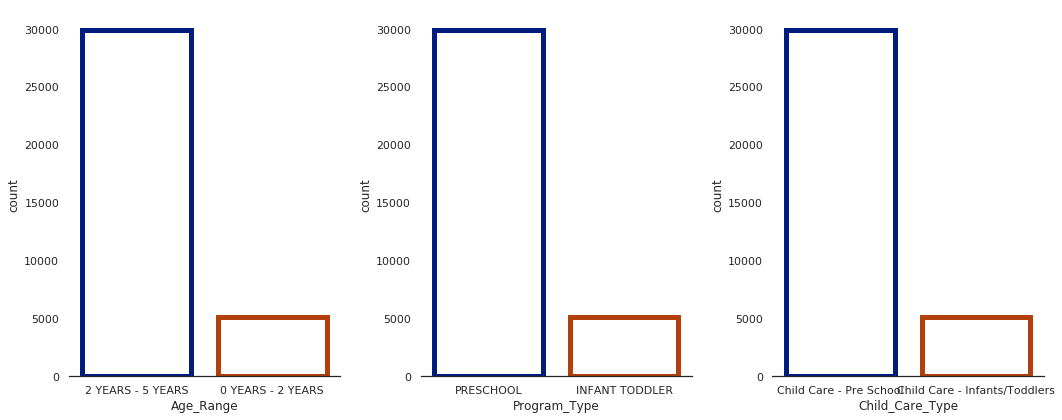

In [34]:
fig, ax =plt.subplots(1,3,figsize=(15, 6), sharex=False)
sns.despine(left=True)
sns.countplot(x="Age_Range", data=violations,
                    facecolor=(0, 0, 0, 0),
                    linewidth=5,
                    edgecolor=sns.color_palette("dark", 3),
                    ax=ax[0])
sns.countplot(x="Program_Type", data=violations,
                    facecolor=(0, 0, 0, 0),
                    linewidth=5,
                    edgecolor=sns.color_palette("dark", 3),
                    ax=ax[1])
sns.countplot(x="Child_Care_Type", data=violations,
                    facecolor=(0, 0, 0, 0),
                    linewidth=5,
                    edgecolor=sns.color_palette("dark", 3),
                    ax=ax[2])
plt.setp(axes, yticks=[])
plt.tight_layout()

inspection shows that the above three categories represent the same thing, so we will only keep one of them

In [0]:
violations=violations.drop(columns=['Program_Type','Child_Care_Type'])

In [37]:
violations.columns

Index(['Center_Name', 'Status', 'Age_Range', 'Maximum_Capacity',
       'Facility_Type', 'Actual', 'Violation_Rate_Percent',
       'Average_Violation_Rate_Percent', 'Total_Educational_Workers',
       'Average_Total_Educational_Workers', 'Staff_Turnover_Rate',
       'Average_Staff_Turn_Over_Rate', 'Public_Health_Hazard_Violation_Rate',
       'Average_Public_Health_Hazard_Violation_Rate',
       'Critical_Violation_Rate', 'Average_Critical_Violation_Rate',
       'Violation_Category', 'Violation_Status'],
      dtype='object')

### 3.2 we are interested in two types of facilities, GDC and SBCC

In [38]:
violations_selected['Facility Type'].unique()

array(['GDC', 'SBCC', 'Camp', 'CAMP'], dtype=object)

In [0]:
violations=violations_selected.loc[violations_selected['Facility Type'].isin(['GDC','SBCC'])]

### 3.3 rename the columns to remove space

In [0]:
violations=violations.rename(columns={"Center Name":"Center_Name","Age Range":"Age_Range",
                                             "Maximum Capacity": "Maximum_Capacity", "Facility Type":"Facility_Type",
                                             "Violation Rate Percent":"Violation_Rate_Percent",
                                             "Average Violation Rate Percent":"Average_Violation_Rate_Percent","Average Total Educational Workers":"Average_Total_Educational_Workers",
                                             "Total Educational Workers": "Total_Educational_Workers","Staff Turnover Rate":"Staff_Turnover_Rate",
                                             "Average Staff Turn Over Rate":"Average_Staff_Turn_Over_Rate","Public Health Hazard Violation Rate":"Public_Health_Hazard_Violation_Rate",
                                             "Average Public Health Hazard Violation Rate":"Average_Public_Health_Hazard_Violation_Rate",
                                             "Average Critical Violation Rate":"Average_Critical_Violation_Rate","Critical Violation Rate":"Critical_Violation_Rate",
                                             "Violation Category":"Violation_Category","Violation Status":"Violation_Status"})

In [0]:
violations=violations.dropna(how='any')

In [42]:
violations.shape

(35050, 20)

## 4.data visualization

### 4.1 visualize distribution of six numeric features

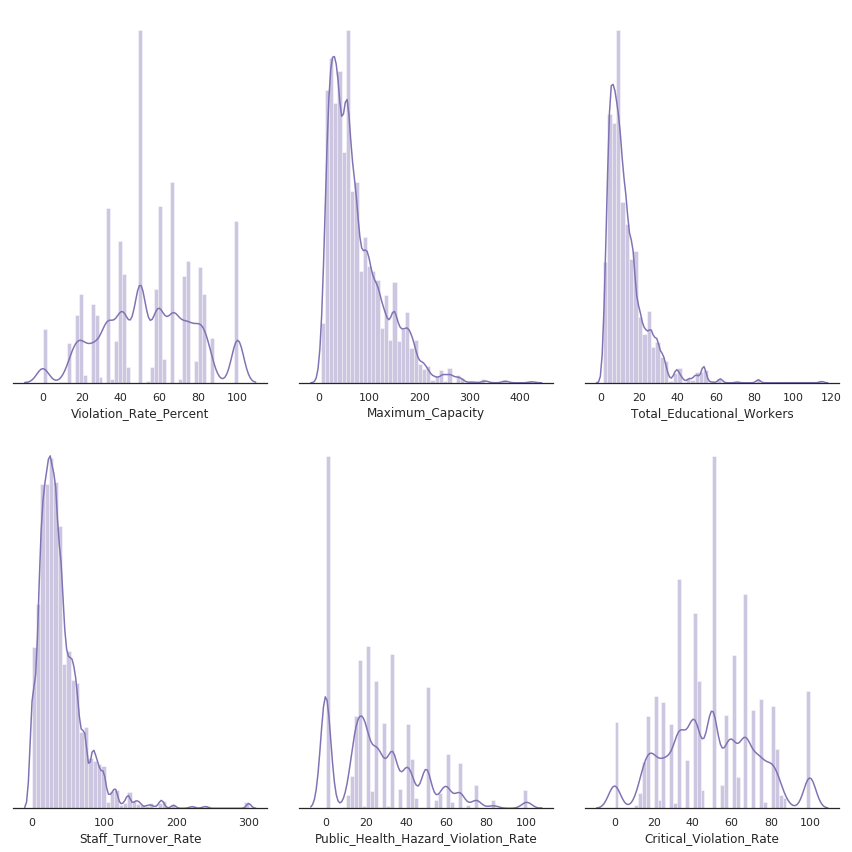

In [14]:

sns.set(style="white", color_codes=True)
f, axes = plt.subplots(2, 3,figsize=(12, 12), sharex=False)
sns.despine(left=True)

sns.distplot(violations["Violation_Rate_Percent"],color="m",ax=axes[0, 0])
sns.distplot(violations["Maximum_Capacity"],color="m",ax=axes[0, 1])
sns.distplot(violations["Total_Educational_Workers"],color="m",ax=axes[0, 2])
sns.distplot(violations["Staff_Turnover_Rate"],color="m",ax=axes[1, 0])
sns.distplot(violations["Public_Health_Hazard_Violation_Rate"],color="m",ax=axes[1, 1])
sns.distplot(violations["Critical_Violation_Rate"],color="m",ax=axes[1, 2])

plt.setp(axes, yticks=[])
plt.tight_layout()

### 4.2 visualize pairwise relationships

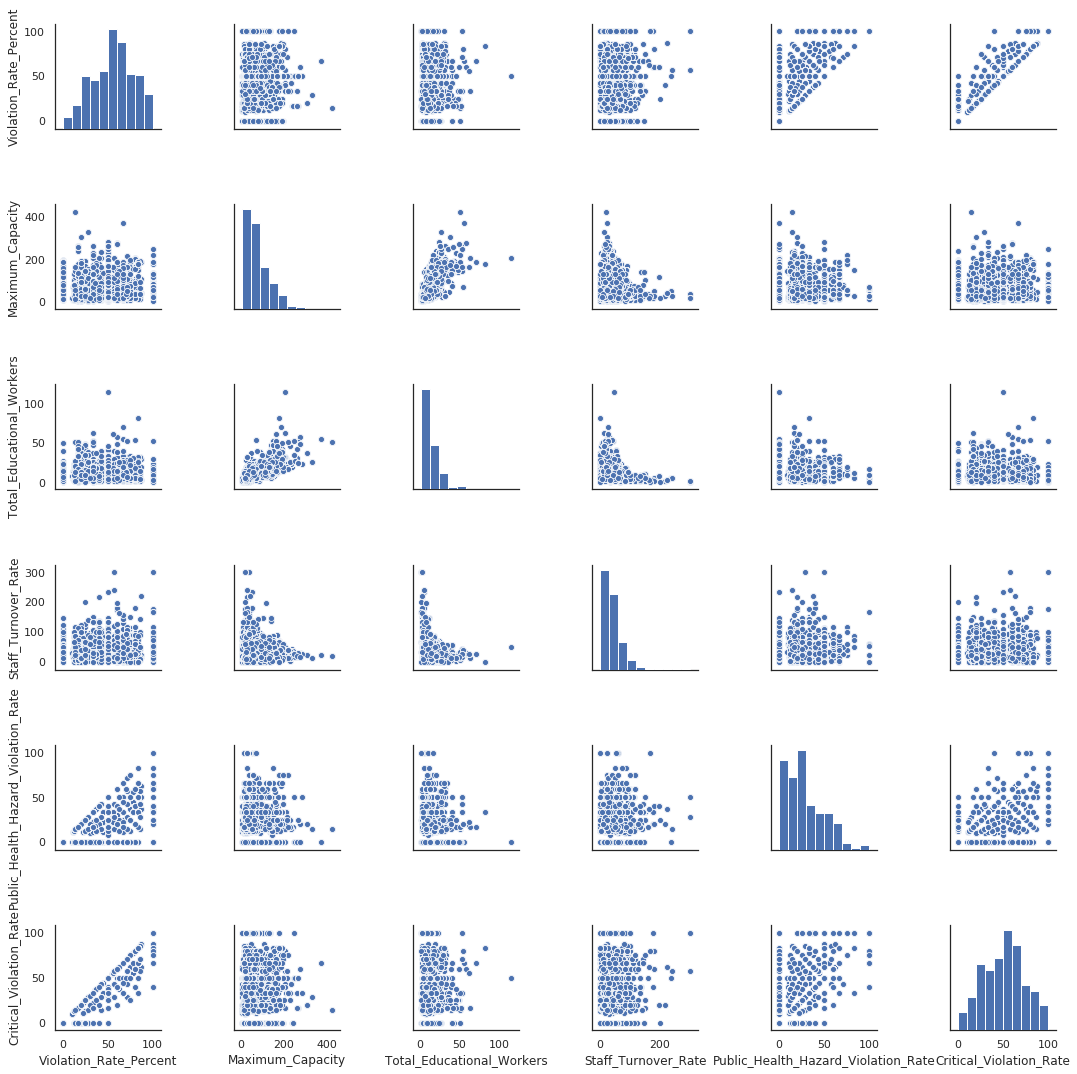

In [18]:
sns.pairplot(violations[["Violation_Rate_Percent","Maximum_Capacity","Total_Educational_Workers","Staff_Turnover_Rate","Public_Health_Hazard_Violation_Rate","Critical_Violation_Rate"]])

### 4.3 visualize correlation among features

Text(0.5, 1.0, 'correlation map')

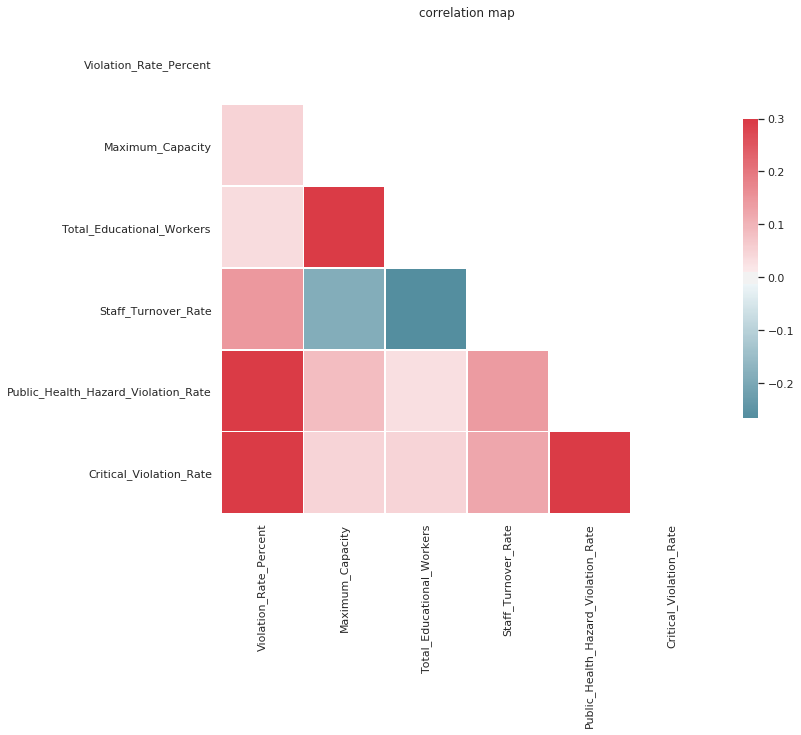

In [45]:
corr =violations[["Violation_Rate_Percent","Maximum_Capacity","Total_Educational_Workers","Staff_Turnover_Rate","Public_Health_Hazard_Violation_Rate","Critical_Violation_Rate"]].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("correlation map")

## 5.models

### 5.1 linear regression

In [0]:
StandardScaler().fit_transform(violations_rename.loc[:,['Maximum_Capacity','Total_Educational_Workers','Staff_Turnover_Rate','Critical_Violation_Rate']])
standardized=violations_rename.loc[:,['Maximum_Capacity','Total_Educational_Workers','Staff_Turnover_Rate','Critical_Violation_Rate']]


In [0]:
lm = smf.ols(formula='Critical_Violation_Rate ~Maximum_Capacity+Total_Educational_Workers+Staff_Turnover_Rate', data=standardized).fit()

In [0]:
lm.params

Intercept                    42.854479
Maximum_Capacity              0.006319
Total_Educational_Workers     0.138412
Staff_Turnover_Rate           0.096573
dtype: float64

In [0]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Critical_Violation_Rate   R-squared:                       0.019
Model:                                 OLS   Adj. R-squared:                  0.019
Method:                      Least Squares   F-statistic:                     227.2
Date:                     Mon, 25 Feb 2019   Prob (F-statistic):          4.87e-146
Time:                             04:55:24   Log-Likelihood:            -1.6100e+05
No. Observations:                    35297   AIC:                         3.220e+05
Df Residuals:                        35293   BIC:                         3.220e+05
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    42.8545      0.290    147.682      0.000      42.286      43.423
Maximum_Capacity              0.0063      0.003      1.932      0.053   -9.32e-05       0.013
Total_Educational_Workers     0.1384      0.017      8.239      0.000       0.105       0.171
Staff_Turnover_Rate           0.0966      0.004     24.856      0.000       0.089       0.104
==============================================================================
Omnibus:                      513.331   Durbin-Watson:                   1.301
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              342.656
Skew:                           0.115   Prob(JB):                     3.92e-75
Kurtosis:                       2.576   Cond. No.                         238.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
lm.rsquared

0.018950709885197425

### 5.2 random forest

In [0]:
from sklearn.ensemble  import RandomForestRegressor as rfr
from sklearn.model_selection import train_test_split

In [0]:
X = standardized.loc[:,['Maximum_Capacity','Total_Educational_Workers','Staff_Turnover_Rate']]
y =standardized.loc[:,['Critical_Violation_Rate']]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
func=rfr()
func.fit(X_train, y_train)

/usr/local/lib/python2.7/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [0]:
func.score(X,y,sample_weight=None)

0.9528477778929555

In [0]:
features= X
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [0]:
# Get numerical feature importances
importances = list(func.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [0]:
feature_importances

[('Maximum_Capacity', 0.4),
 ('Staff_Turnover_Rate', 0.36),
 ('Total_Educational_Workers', 0.24)]

### 5.3 neural network

In [0]:
# define the model
def larger_model():
	# create model
	model = Sequential()
	model.add(Dense(13, input_dim=3, kernel_initializer='normal', activation='relu'))
	model.add(Dense(6, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [0]:
estimators = []
seed=2
estimators.append(('mlp', KerasRegressor(build_fn=larger_model, epochs=100, batch_size=50, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X, y, cv=kfold)
print("Larger: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Larger: -533.45 (20.37) MSE


In [0]:
# define wider model
def wider_model():
	# create model
	model = Sequential()
	model.add(Dense(20, input_dim=3, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [0]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=wider_model, epochs=100, batch_size=50, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X, y, cv=kfold)
print("Wider: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Wider: -529.66 (21.01) MSE
